### Задание 1.

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import pandas_datareader as pdr

Импортируем данные по акциям Apple, Google, Facebook из Yahoo Finance.

In [4]:
data = pdr.get_data_yahoo(symbols=['AAPL', 'GOOGL', 'FB'], start="2010-05-26", end="2020-05-26")

Оставляем данные только по ценам закрытия. Акции Facebook начали выпускаться только с 18 мая 2012, поэтому по ним данные только за 8 лет.

In [5]:
data = pd.DataFrame(data.Close)

### Задание 2.

С помощью функции pct_change() создаем столбцы с доходностями акции каждой компании.

In [6]:
data["Apple returns"] = data["AAPL"].pct_change()
data["Google returns"] = data["GOOGL"].pct_change()
data["FB returns"] = data["FB"].pct_change()

Считаем статистики распределания доходностей: видим, что наблюдений по Apple и Google действительно на 500 больше, чем по Facebook. Также считаем среднее, стандартное отклонение, минимум, максимум и квартили.

In [7]:
data[["Apple returns", "Google returns", "FB returns"]].describe()

Symbols,Apple returns,Google returns,FB returns
count,2516.000000,2516.000000,2016.000000
mean,0.001027,0.000841,0.001168
std,0.017293,0.016233,0.023507
min,-0.128647,-0.116342,-0.189609
25%,-0.007027,-0.006501,-0.009159
50%,0.000833,0.000678,0.001054
75%,0.009941,0.008621,0.011959
max,0.119808,0.162584,0.296115


In [8]:
data.head()

Symbols,AAPL,GOOGL,FB,Apple returns,Google returns,FB returns
Date,,,,,,
2010-05-26,34.872856,237.972977,NaN,NaN,NaN,NaN
2010-05-27,36.192856,245.475479,NaN,0.037852,0.031527,NaN
2010-05-28,36.697144,243.058060,NaN,0.013933,-0.009848,NaN
2010-06-01,37.261429,241.426422,NaN,0.015377,-0.006713,NaN
2010-06-02,37.707142,246.931931,NaN,0.011962,0.022804,NaN


Чтобы определить распределения доходностей, визуализируем доходности акций каждой компании.

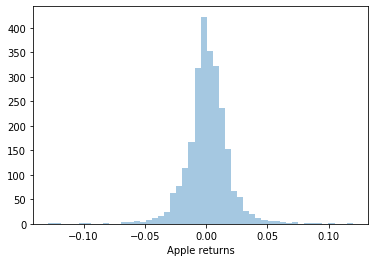

In [9]:
seaborn.distplot(data["Apple returns"], kde=False)

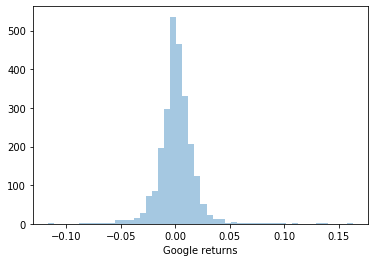

In [10]:
seaborn.distplot(data["Google returns"], kde=False)

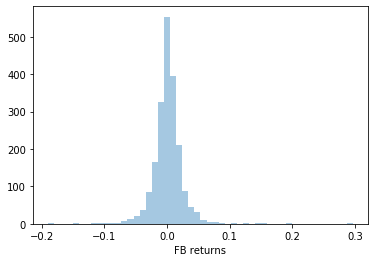

In [11]:
seaborn.distplot(data["FB returns"], kde=False)

Заметим, что распределения daily returns всех трех акций довольно симметричные, имеют форму колокола, как у стандартного нормального распределения, однако имеют более тяжелые "хвосты". Поэтому можно сделать вывод, что это t-распределение Стьюдента.

Для формальности проведем тест на нормальность. Удалим nan.

In [12]:
apple_array = np.array(data["Apple returns"])
apple_array = np.delete(apple_array, 0)

google_array = np.array(data["Google returns"])
google_array = np.delete(google_array, 0)

fb_array = np.array(data["FB returns"])
fb_array = fb_array[~np.isnan(fb_array)]

In [13]:
k2_apple, p_apple = stats.normaltest(apple_array)
k2_google, p_google = stats.normaltest(google_array)
k2_fb, p_fb = stats.normaltest(fb_array)

In [14]:
alpha = 1e-3
if p_apple < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for Apple can be rejected")
else:
    print("The null hypothesis for Apple cannot be rejected")
    
if p_google < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for Google can be rejected")
else:
    print("The null hypothesis for Google cannot be rejected")
    
if p_fb < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis for FB can be rejected")
else:
    print("The null hypothesis for FB cannot be rejected")

The null hypothesis for Apple can be rejected
The null hypothesis for Google can be rejected
The null hypothesis for FB can be rejected


В итоге, все три гипотезы отвергаются, то есть распределения daily returns всех трех акций не являются нормальными.

Для подтверждения гипотезы о t-распределении Стьюдента воспользуемся методом fitter.

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
from fitter import Fitter
f_apple = Fitter(apple_array)
f_apple.fit()

Fitted alpha distribution with error=716.2418983373329)
Fitted anglit distribution with error=8358.389041928322)
Fitted arcsine distribution with error=8407.754958798141)
Fitted argus distribution with error=6026.8380038207615)
Fitted beta distribution with error=626.2156074040499)
Fitted betaprime distribution with error=633.8375595409652)
Fitted bradford distribution with error=6999.910344191777)
Fitted burr distribution with error=1619.1467780374278)
Fitted burr12 distribution with error=309.27791288291616)
Fitted cauchy distribution with error=430.7792799551438)
Fitted chi distribution with error=649.3119044059398)
Fitted chi2 distribution with error=8549.092135575724)
Fitted cosine distribution with error=8358.389041928322)
Fitted crystalball distribution with error=418.13407976905415)
Fitted dgamma distribution with error=143.6564664217082)
Fitted dweibull distribution with error=167.99358377790713)
Fitted erlang distribution with error=660.8945849785773)
Fitted expon distributio

,sumsquare_error,aic,bic,kl_div
t,102.169382,212.394918,-8037.253358,inf
nct,103.667397,214.264658,-7992.800984,inf
tukeylambda,104.040755,221.196978,-7991.586311,inf
johnsonsu,105.452368,225.490024,-7949.848592,inf
norminvgauss,111.612406,244.168507,-7807.008116,inf


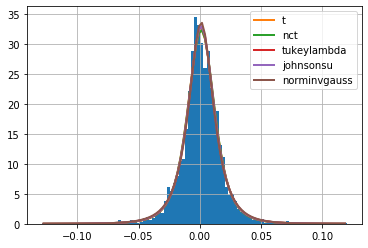

In [17]:
f_apple.summary()

In [18]:
f_google = Fitter(google_array)
f_google.fit()

Fitted alpha distribution with error=801.2274034282248)
Fitted anglit distribution with error=8359.821865326307)
Fitted arcsine distribution with error=8347.423187131006)
Fitted argus distribution with error=6936.864290943047)
Fitted beta distribution with error=791.1386622650971)
Fitted betaprime distribution with error=788.029948739337)
Fitted bradford distribution with error=7048.185785087924)
Fitted burr distribution with error=2262.6902965823974)
Fitted burr12 distribution with error=214.61179466221674)
Fitted cauchy distribution with error=296.55841974324386)
Fitted chi distribution with error=795.6529320404769)
Fitted chi2 distribution with error=8871.375299003916)
Fitted cosine distribution with error=8359.821865326307)
Fitted crystalball distribution with error=581.86468149888)
Fitted dgamma distribution with error=74.92473610322249)
Fitted dweibull distribution with error=85.21534030571259)
Fitted erlang distribution with error=8479.05998832713)
Fitted expon distribution with

Заметим, что хоть summary и не выдаёт нам t-распределение, как наиболее вероятное, оно всё равно имеет ошибку в 92.69, что довольно близко к полученным результатам.

,sumsquare_error,aic,bic,kl_div
dgamma,74.924736,600.989659,-8817.585604,inf
dweibull,85.215340,578.516642,-8493.783004,inf
laplace,85.460323,559.305081,-8494.390651,inf
tukeylambda,86.021740,346.978243,-8470.085851,inf
loglaplace,86.546501,539.008864,-8454.784043,inf


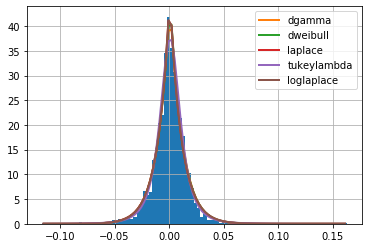

In [19]:
f_google.summary()

In [20]:
f_fb = Fitter(fb_array)
f_fb.fit()

Fitted alpha distribution with error=424.55447428591145)
Fitted anglit distribution with error=2759.01468136341)
Fitted arcsine distribution with error=3483.8093460495984)
Fitted argus distribution with error=3042.5037671057753)
Fitted beta distribution with error=416.0820225262319)
Fitted betaprime distribution with error=413.53141496391163)
Fitted bradford distribution with error=3043.2065267883772)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=112.21471384840756)
Fitted chi distribution with error=427.0170818230013)
Fitted chi2 distribution with error=629.8167661260369)
Fitted cosine distribution with error=3478.4880449957554)
Fitted crystalball distribution with error=326.6042716776348)
Fitted dgamma distribution with error=46.76787022161224)
Fitted dweibull distribution with error=56.204916818522484)
Fitted erlang distribution with error=3225.2333183523456)
Fitted expon distri

,sumsquare_error,aic,bic,kl_div
johnsonsu,32.077029,563.809815,-8317.277108,inf
t,34.910421,515.934686,-8154.241251,inf
laplace,38.476033,974.916792,-7965.793803,inf
dgamma,46.767870,941.043150,-7564.740567,inf
dweibull,56.204917,891.978673,-7194.184027,inf


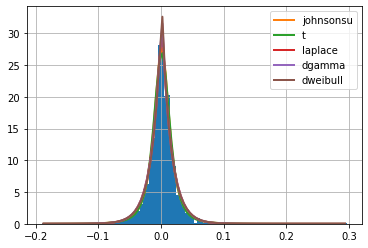

In [21]:
f_fb.summary()

Анализ доказывает, что daily returns имеют t-распределение Стьюдента.

Теперь проверим ряды на стационарность. Визуально по графикам видно отсутствие трендов, практически неизменную дисперсию.

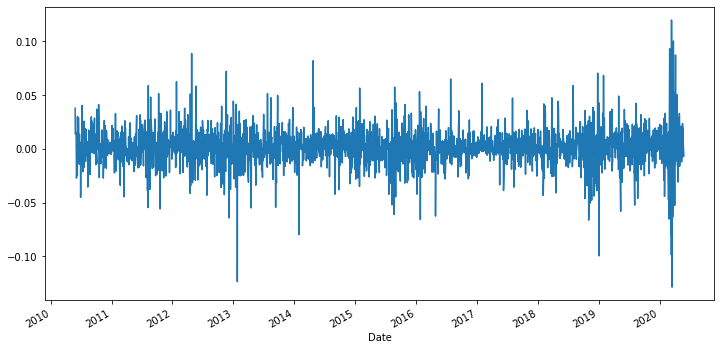

In [22]:
data["Apple returns"].plot(figsize=(12,6))

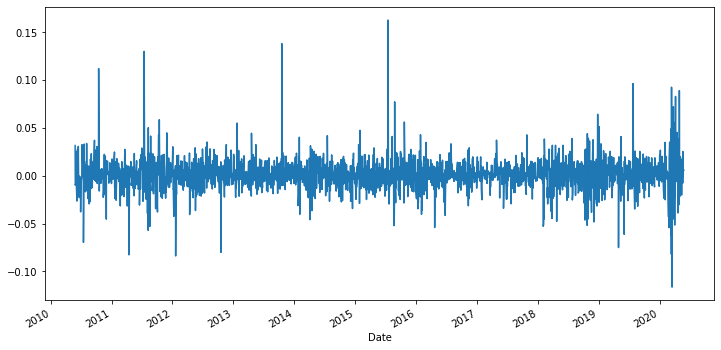

In [23]:
data["Google returns"].plot(figsize=(12,6))

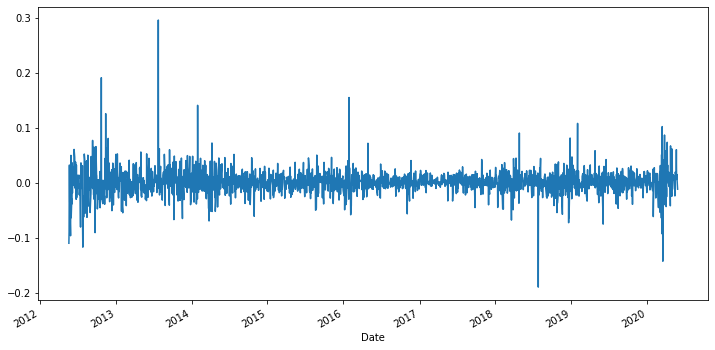

In [24]:
data["FB returns"].plot(figsize=(12,6))

Проверим также ряды на стационарность при помощи критерия Дики-Фуллера.

In [25]:
import statsmodels.api as sm
test = sm.tsa.adfuller(apple_array)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Есть единичные корни, ряд Daily Apple returns не стационарен')
else:
    print('Единичных корней нет, ряд Daily Apple returns стационарен')

adf:  -10.238487785991106
p-value:  4.8185389286541036e-18
Critical values:  {'1%': -3.4329747166494915, '5%': -2.862699584647827, '10%': -2.567387292022104}
Единичных корней нет, ряд Daily Apple returns стационарен


In [26]:
import statsmodels.api as sm
test = sm.tsa.adfuller(google_array)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Есть единичные корни, ряд Daily Google returns не стационарен')
else:
    print('Единичных корней нет, ряд Daily Google returns стационарен')

adf:  -17.059113991145516
p-value:  7.969747806601949e-30
Critical values:  {'1%': -3.4329610922579095, '5%': -2.8626935681060375, '10%': -2.567384088736619}
Единичных корней нет, ряд Daily Google returns стационарен


In [27]:
import statsmodels.api as sm
test = sm.tsa.adfuller(fb_array)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Есть единичные корни, ряд Daily FB returns не стационарен')
else:
    print('Единичных корней нет, ряд Daily FB returns стационарен')

adf:  -15.099695523359285
p-value:  7.973394063677832e-28
Critical values:  {'1%': -3.4336140516629836, '5%': -2.8629818846551376, '10%': -2.5675375973574788}
Единичных корней нет, ряд Daily FB returns стационарен


Все ряды оказались стационарными.

Проверим взаимосвязь между прошлыми и будущими значениями временного ряда. Для этого вначале помотрим на графики автокорреляций. Возьмем лаг в 31, как примерное количество дней в месяце.

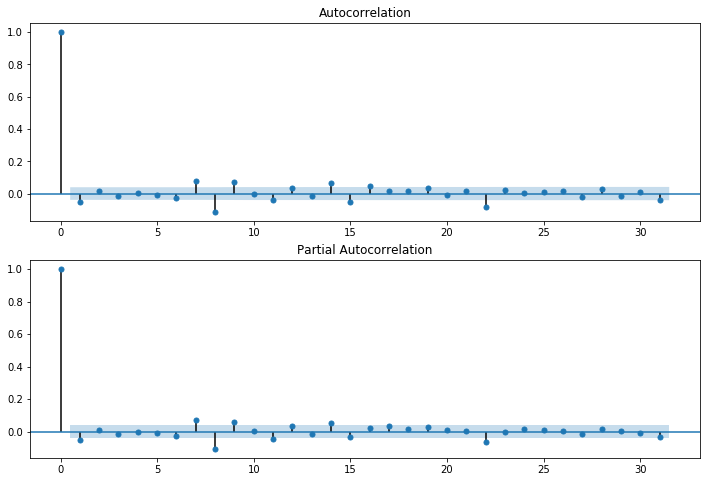

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(apple_array.squeeze(), lags=31, ax=ax)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(apple_array, lags=31, ax=ax2)

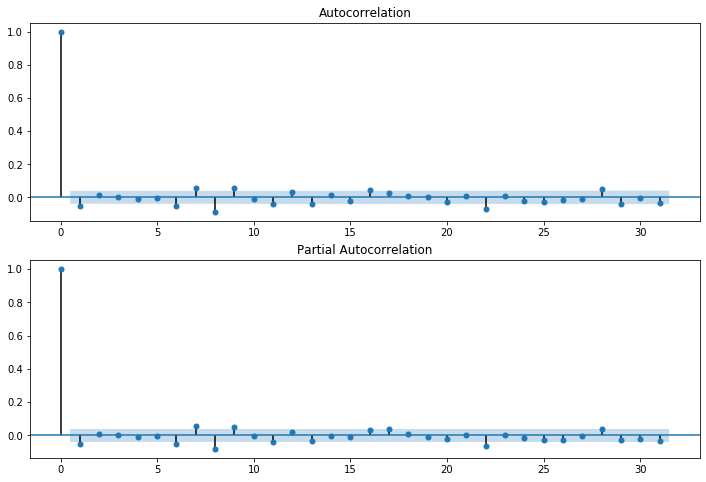

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(google_array.squeeze(), lags=31, ax=ax)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(google_array, lags=31, ax=ax2)

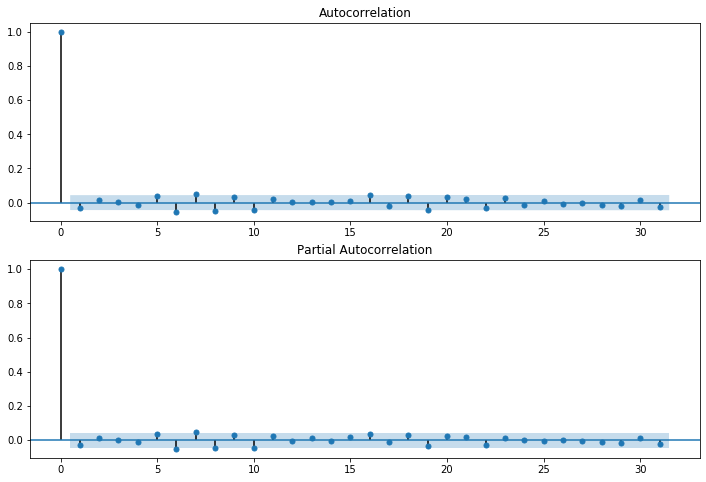

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(fb_array.squeeze(), lags=31, ax=ax)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(fb_array, lags=31, ax=ax2)

Заметим, что доходности акций Apple и Google значимо зависят от лага в 7-9 дней, хотя при этом величина корреляции очень маленькая, около 0.1. Небольшая значимость появляется также у лагов в 14 и 22 дня, что примерно соответствует лагу в 2 и 3 недели.
У доходности акций Facebook наблюдается только совсем небольшая значимость лага 7-9 дней.

Далее проверим, есть ли взаимосвязь между прошлыми и будущими значениями временного ряда для каждой отдельно выбранной доходности акции при помощи авторегрессии.

In [31]:
from statsmodels.tsa.ar_model import AR

In [32]:
model = AR(apple_array)
model_fitted = model.fit(maxlag= 31)
print(model_fitted.summary())

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 2516
Model:                         AR(31)   Log Likelihood                6611.061
Method:                          cmle   S.D. of innovations              0.017
Date:                Wed, 27 May 2020   AIC                             -8.132
Time:                        06:11:05   BIC                             -8.055
Sample:                             0   HQIC                            -8.104
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.772      0.006       0.000       0.002
L1.y          -0.0367      0.020     -1.816      0.069      -0.076       0.003
L2.y           0.0027      0.020      0.133      0.8

In [33]:
model = AR(google_array)
model_fitted = model.fit(maxlag= 31)
print(model_fitted.summary())

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 2516
Model:                         AR(31)   Log Likelihood                6759.871
Method:                          cmle   S.D. of innovations              0.016
Date:                Wed, 27 May 2020   AIC                             -8.252
Time:                        06:11:07   BIC                             -8.175
Sample:                             0   HQIC                            -8.224
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.219      0.001       0.000       0.002
L1.y          -0.0428      0.020     -2.122      0.034      -0.082      -0.003
L2.y           0.0014      0.020      0.068      0.9

In [34]:
model = AR(fb_array)
model_fitted = model.fit(maxlag= 31)
print(model_fitted.summary())

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 2016
Model:                         AR(31)   Log Likelihood                4689.887
Method:                          cmle   S.D. of innovations              0.023
Date:                Wed, 27 May 2020   AIC                             -7.530
Time:                        06:11:10   BIC                             -7.437
Sample:                             0   HQIC                            -7.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      2.297      0.022       0.000       0.002
L1.y          -0.0287      0.023     -1.268      0.205      -0.073       0.016
L2.y           0.0103      0.023      0.456      0.6

Результаты авторегрессий подтверждают наблюдения, сделанные из графиков. Доходности акций Apple, Google, Facebook значимо зависят от лага в 7-9 дней, Apple еще от лагов в 14 и 22 дня, Google от лага в 22 дня.

Посчитаем корреляцию для выявления взаимосвязей между return-ами  различных инструментов. Выясним, с какого дня начинают торговаться акции Facebook и ограничим выборку по всем трём компаниям, начиная с этой даты.

In [35]:
data[data['FB returns'].isna()]

Symbols,AAPL,GOOGL,FB,Apple returns,Google returns,FB returns
Date,,,,,,
2010-05-26,34.872856,237.972977,NaN,NaN,NaN,NaN
2010-05-27,36.192856,245.475479,NaN,0.037852,0.031527,NaN
2010-05-28,36.697144,243.058060,NaN,0.013933,-0.009848,NaN
2010-06-01,37.261429,241.426422,NaN,0.015377,-0.006713,NaN
2010-06-02,37.707142,246.931931,NaN,0.011962,0.022804,NaN
...,...,...,...,...,...,...
2012-05-14,79.745712,302.302307,NaN,-0.014981,-0.002032,NaN
2012-05-15,79.024284,305.860870,NaN,-0.009047,0.011772,NaN
2012-05-16,78.011429,314.779785,NaN,-0.012817,0.029160,NaN


In [36]:
data_final = data[['Apple returns', 'Google returns', 'FB returns']][data.index > '2012-05-18']

In [37]:
data_final.corr()

Symbols,Apple returns,Google returns,FB returns
Symbols,,,
Apple returns,1.000000,0.520414,0.368133
Google returns,0.520414,1.000000,0.483827
FB returns,0.368133,0.483827,1.000000


Каждая доходность довольно сильно положительно скоррелированна с двумя другими доходностями акций.

Посчитаем Granger causality.

In [38]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=9
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False): 
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data_final, variables = data_final.columns)

,Apple returns_x,Google returns_x,FB returns_x
Apple returns_y,1.0000,0.0000,0.0610
Google returns_y,0.0000,1.0000,0.6219
FB returns_y,0.0003,0.0012,1.0000


Мы получили матрицу с p-values внутри. По результатам Apple влияет на Google и Facebook (p-values < 0.05), Google влияет на Apple и Facebook (p-values < 0.05), Facebook значимо ни на что не влияет.

In [39]:
data

Symbols,AAPL,GOOGL,FB,Apple returns,Google returns,FB returns
Date,,,,,,
2010-05-26,34.872856,237.972977,NaN,NaN,NaN,NaN
2010-05-27,36.192856,245.475479,NaN,0.037852,0.031527,NaN
2010-05-28,36.697144,243.058060,NaN,0.013933,-0.009848,NaN
2010-06-01,37.261429,241.426422,NaN,0.015377,-0.006713,NaN
2010-06-02,37.707142,246.931931,NaN,0.011962,0.022804,NaN
...,...,...,...,...,...,...
2020-05-19,313.140015,1374.400024,216.880005,-0.005778,-0.007782,0.017309
2020-05-20,319.230011,1409.160034,229.970001,0.019448,0.025291,0.060356
2020-05-21,316.850006,1406.750000,231.389999,-0.007455,-0.001710,0.006175


### Задание 3.

Генерируем случайные значения: по две случайные реализации для каждой компании. Рассчитаем Profit-and-loss, как произведения сгенерированных случайных величин с доходностями акций. Считаем кумулятивные суммы.

In [40]:
data["Apple random"] = np.random.normal(0, 1, size=len(data[["Apple returns"]]))
data["Google random"] = np.random.normal(0, 1, size=len(data[["Google returns"]]))
data["FB random"] = np.random.normal(0, 1, size=len(data[["FB returns"]]))
data["Apple random_1"] = np.random.normal(0, 1, size=len(data[["Apple returns"]]))
data["Google random_1"] = np.random.normal(0, 1, size=len(data[["Google returns"]]))
data["FB random_1"] = np.random.normal(0, 1, size=len(data[["FB returns"]]))

In [41]:
data["Apple pnl"] = data["Apple returns"]*data["Apple random"]
data["Google pnl"] = data["Google returns"]*data["Google random"]
data["FB pnl"] = data["FB returns"]*data["FB random"]
data["Apple pnl_1"] = data["Apple returns"]*data["Apple random_1"]
data["Google pnl_1"] = data["Google returns"]*data["Google random_1"]
data["FB pnl_1"] = data["FB returns"]*data["FB random_1"]

In [42]:
data["Apple cumsum_pnl"] = np.cumsum(data["Apple pnl"])
data["Google cumsum_pnl"] = np.cumsum(data["Google pnl"])
data["FB cumsum_pnl"] = np.cumsum(data["FB pnl"])
data["Apple cumsum_pnl_1"] = np.cumsum(data["Apple pnl_1"])
data["Google cumsum_pnl_1"] = np.cumsum(data["Google pnl_1"])
data["FB cumsum_pnl_1"] = np.cumsum(data["FB pnl_1"])

In [43]:
data.head()

Symbols,AAPL,GOOGL,FB,Apple returns,Google returns,FB returns,Apple random,Google random,FB random,Apple random_1,...,FB pnl,Apple pnl_1,Google pnl_1,FB pnl_1,Apple cumsum_pnl,Google cumsum_pnl,FB cumsum_pnl,Apple cumsum_pnl_1,Google cumsum_pnl_1,FB cumsum_pnl_1
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-26,34.872856,237.972977,NaN,NaN,NaN,NaN,0.230736,0.118470,-0.974949,0.632395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-27,36.192856,245.475479,NaN,0.037852,0.031527,NaN,1.298558,-0.158528,-0.174463,-1.833179,...,NaN,-0.069389,0.002832,NaN,0.049153,-0.004998,NaN,-0.069389,0.002832,NaN
2010-05-28,36.697144,243.058060,NaN,0.013933,-0.009848,NaN,0.610712,0.364454,0.446215,0.625907,...,NaN,0.008721,-0.010910,NaN,0.057662,-0.008587,NaN,-0.060668,-0.008078,NaN
2010-06-01,37.261429,241.426422,NaN,0.015377,-0.006713,NaN,1.064189,-0.546545,0.834849,0.810524,...,NaN,0.012463,0.010074,NaN,0.074026,-0.004918,NaN,-0.048205,0.001996,NaN
2010-06-02,37.707142,246.931931,NaN,0.011962,0.022804,NaN,-0.792277,0.661943,0.380254,0.271086,...,NaN,0.003243,-0.009852,NaN,0.064549,0.010177,NaN,-0.044962,-0.007855,NaN


Построим графики pnl_i для доходности акций каждой компании.

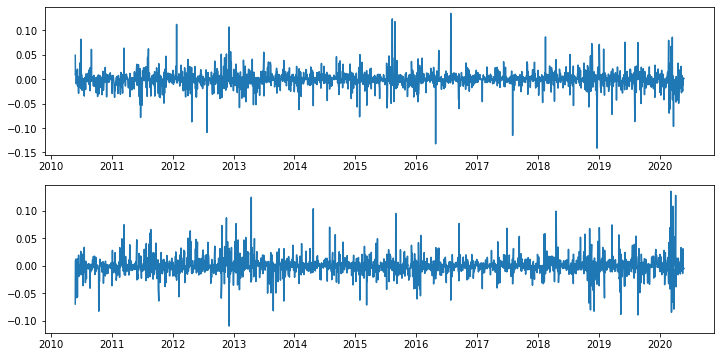

In [44]:
from pylab import *
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["Apple pnl"])
subplot(212)
fig = plt.plot(data["Apple pnl_1"])

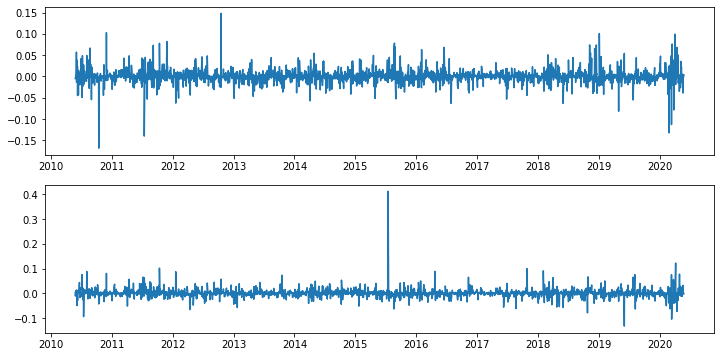

In [45]:
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["Google pnl"])
subplot(212)
fig = plt.plot(data["Google pnl_1"])

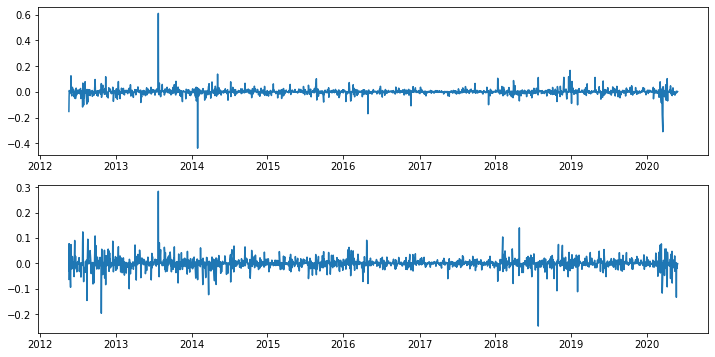

In [46]:
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["FB pnl"])
subplot(212)
fig = plt.plot(data["FB pnl_1"])

Теперь построим графики кумулятивных сумм по доходности акций каждой компании.

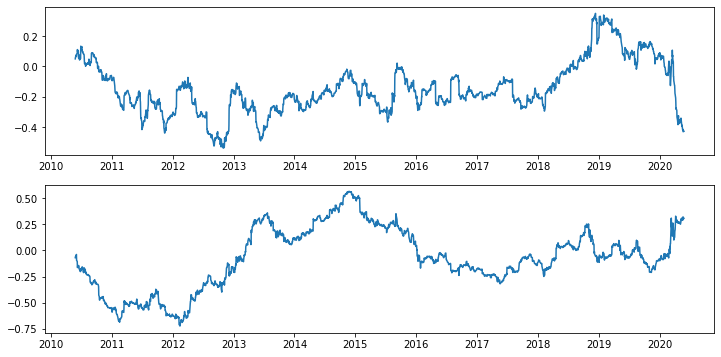

In [47]:
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["Apple cumsum_pnl"])
subplot(212)
fig = plt.plot(data["Apple cumsum_pnl_1"])

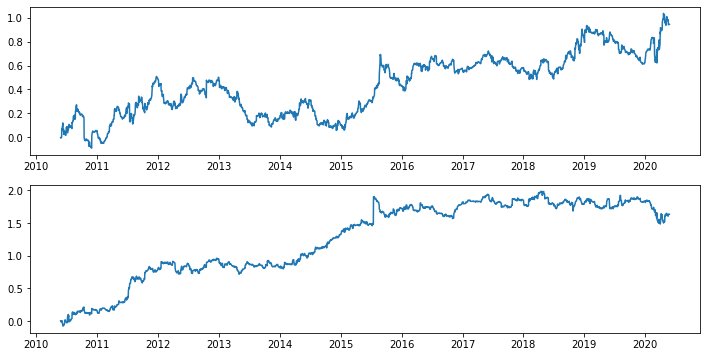

In [48]:
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["Google cumsum_pnl"])
subplot(212)
fig = plt.plot(data["Google cumsum_pnl_1"])

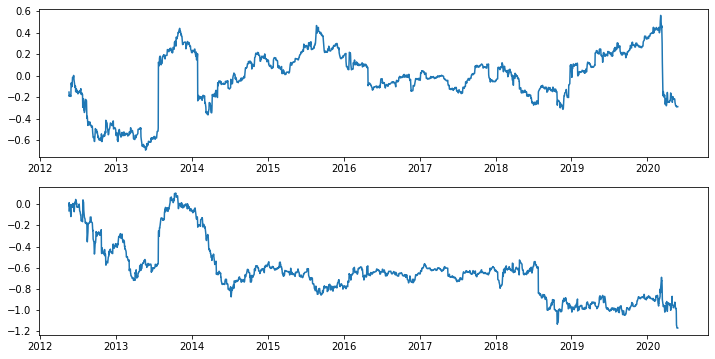

In [49]:
fig = plt.figure(figsize=(12,6))
subplot(211)
fig = plt.plot(data["FB cumsum_pnl"])
subplot(212)
fig = plt.plot(data["FB cumsum_pnl_1"])

### Задание 4.

Реализуем по 50 столбцов со случайными значениями для каждой компании. Затем посчитаем hit-rate, Sharpe Ratio.

In [50]:
x = []
y = []
color = []
for i in range(50):
    data["Apple random_1"] = np.random.normal(0, 1, size=len(data[["Apple returns"]]))
    data["Google random_1"] = np.random.normal(0, 1, size=len(data[["Google returns"]]))
    data["FB random_1"] = np.random.normal(0, 1, size=len(data[["FB returns"]]))
    
    data["Apple pnl_1"] = data["Apple returns"]*data["Apple random_1"]
    data["Google pnl_1"] = data["Google returns"]*data["Google random_1"]
    data["FB pnl_1"] = data["FB returns"]*data["FB random_1"]
    
    data["Apple cumsum_pnl_1"] = np.cumsum(data["Apple pnl_1"])
    data["Google cumsum_pnl_1"] = np.cumsum(data["Google pnl_1"])
    data["FB cumsum_pnl_1"] = np.cumsum(data["FB pnl_1"])
    
    data["Apple hit rate"] = 0
    data["Apple hit rate"][np.sign(data['Apple returns']) == np.sign(data['Apple random_1'])] = 1
    data["Google hit rate"] = 0
    data["Google hit rate"][np.sign(data['Google returns']) == np.sign(data['Google random_1'])] = 1
    data["FB hit rate"] = 0
    data["FB hit rate"][np.sign(data['FB returns']) == np.sign(data['FB random_1'])] = 1
    
    data_final = data[data.index > '2012-05-18']
    apple_hit_rate = sum(data_final["Apple hit rate"])/len(data_final["Apple hit rate"])
    google_hit_rate = sum(data_final["Google hit rate"])/len(data_final["Google hit rate"])
    fb_hit_rate = sum(data_final["FB hit rate"])/len(data_final["FB hit rate"])
    
    apple_sharpe_ratio = data_final['Apple pnl_1'].mean()/data_final['Apple pnl_1'].std()
    google_sharpe_ratio = data_final['Google pnl_1'].mean()/data_final['Google pnl_1'].std()
    fb_sharpe_ratio = data_final['FB pnl_1'].mean()/data_final['FB pnl_1'].std()
    
    x.append(apple_hit_rate)
    y.append(apple_sharpe_ratio)
    color.append('yellow')
    x.append(google_hit_rate)
    y.append(google_sharpe_ratio)
    color.append('blue')
    x.append(fb_hit_rate)
    y.append(fb_sharpe_ratio)
    color.append('red')

Изобразим на диаграмме рассеяния полученные hit rates и Sharpe ratios. Компания Apple выделена желтым цветом, Google - синим, Facebook - красным. Видим, что прогноз hit rate находится всегда в диапазоне 0.45-0.55.

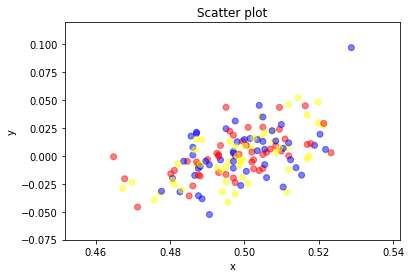

In [51]:
plt.scatter(x, y, color = color, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()